In [1]:
%matplotlib notebook
import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [2]:
epoch = "299"
image_dim = 80

In [3]:
d_fn = "./../drawing/canvasses_epoch"+epoch+".npy"

def sigmoid(x):
    return 1/(1 +np.exp(-x))

drawings = np.load(d_fn)
#drawings[-1, :, :] = sigmoid(drawings[-1, :, :])
#drawings = sigmoid(drawings)

In [4]:
drawings.shape

(1, 40, 6400)

In [5]:
drawings[-1, :, :].min()

0.0

<IPython.core.display.Javascript object>


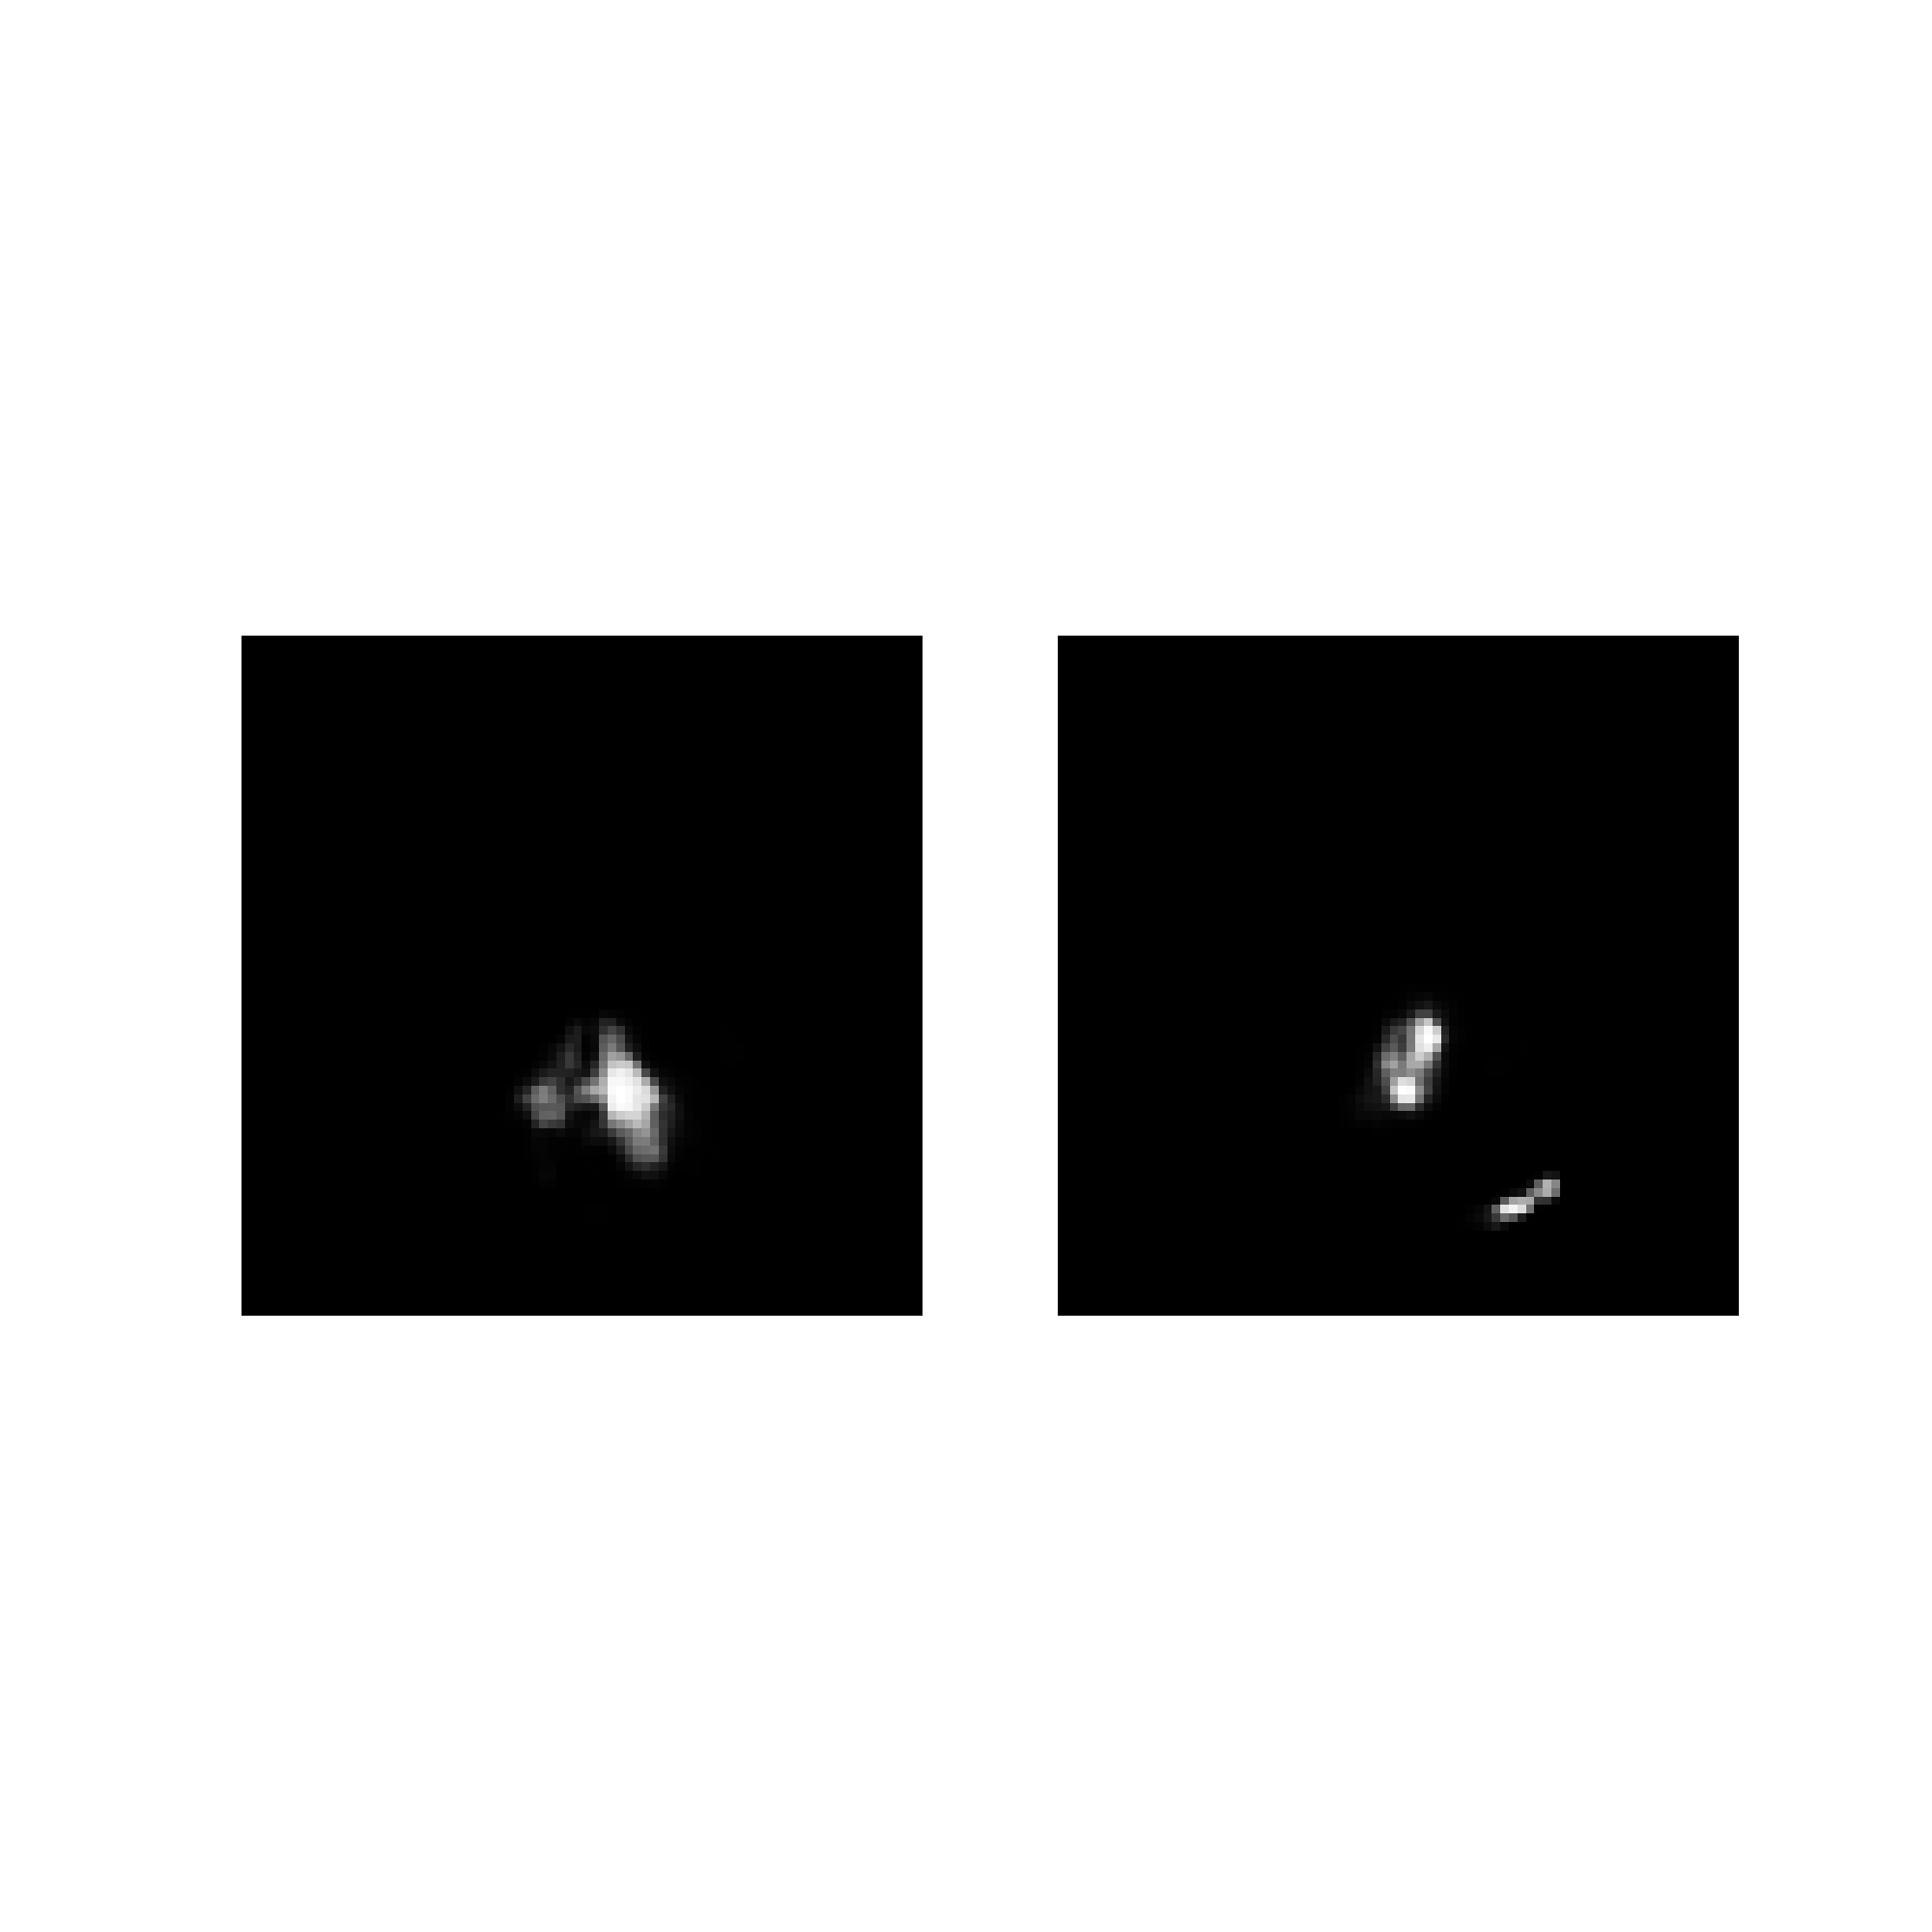

In [6]:
T = drawings.shape[0]
n_plots = 2
which = 9
ref = 2

vmax = np.max(drawings[0]) #np.max(drawings[T-1][which])
vmin = np.min(drawings[0]) #np.min(drawings[T-1][which])

fig, ax = plt.subplots(nrows=T, ncols=n_plots, figsize=(10, 10) )

for t in range(T):
    if T == 1:
        ao = ax
    else:
        ao = ax[t]
    w = which
    normal = drawings[t][w].reshape((image_dim, image_dim)) #- drawings[0][w].reshape((128, 128))
    reference = drawings[t][ref].reshape((image_dim, image_dim))
    ao[0].axis("off")
    ao[1].axis("off")
    if not t==(T-1):
        img_1 = ao[1].imshow(reference, cmap="Greys_r")
        img_0 = ao[0].imshow(normal,  cmap="Greys_r")
    else:
        img_1 = ao[1].imshow(reference, cmap="Greys_r")
        img_0 = ao[0].imshow(normal, cmap="Greys_r")
        
    
    #print(t, np.max(normal), np.min(normal), np.average(normal), np.std(normal))


In [7]:
batch_size = drawings.shape[1]

finished = drawings[-1:,:,].reshape((batch_size, image_dim,  image_dim))
#finished[finished > 255] = 255 
reference = np.load("../drawing/references_epoch"+epoch+".npy").reshape((batch_size, image_dim, image_dim))
#reference[reference < 0.2] = 0

In [8]:
print(reference.max(), reference.min())
print(finished.max(), finished.min())

1.0 0.0
0.9418476 0.0


<IPython.core.display.Javascript object>


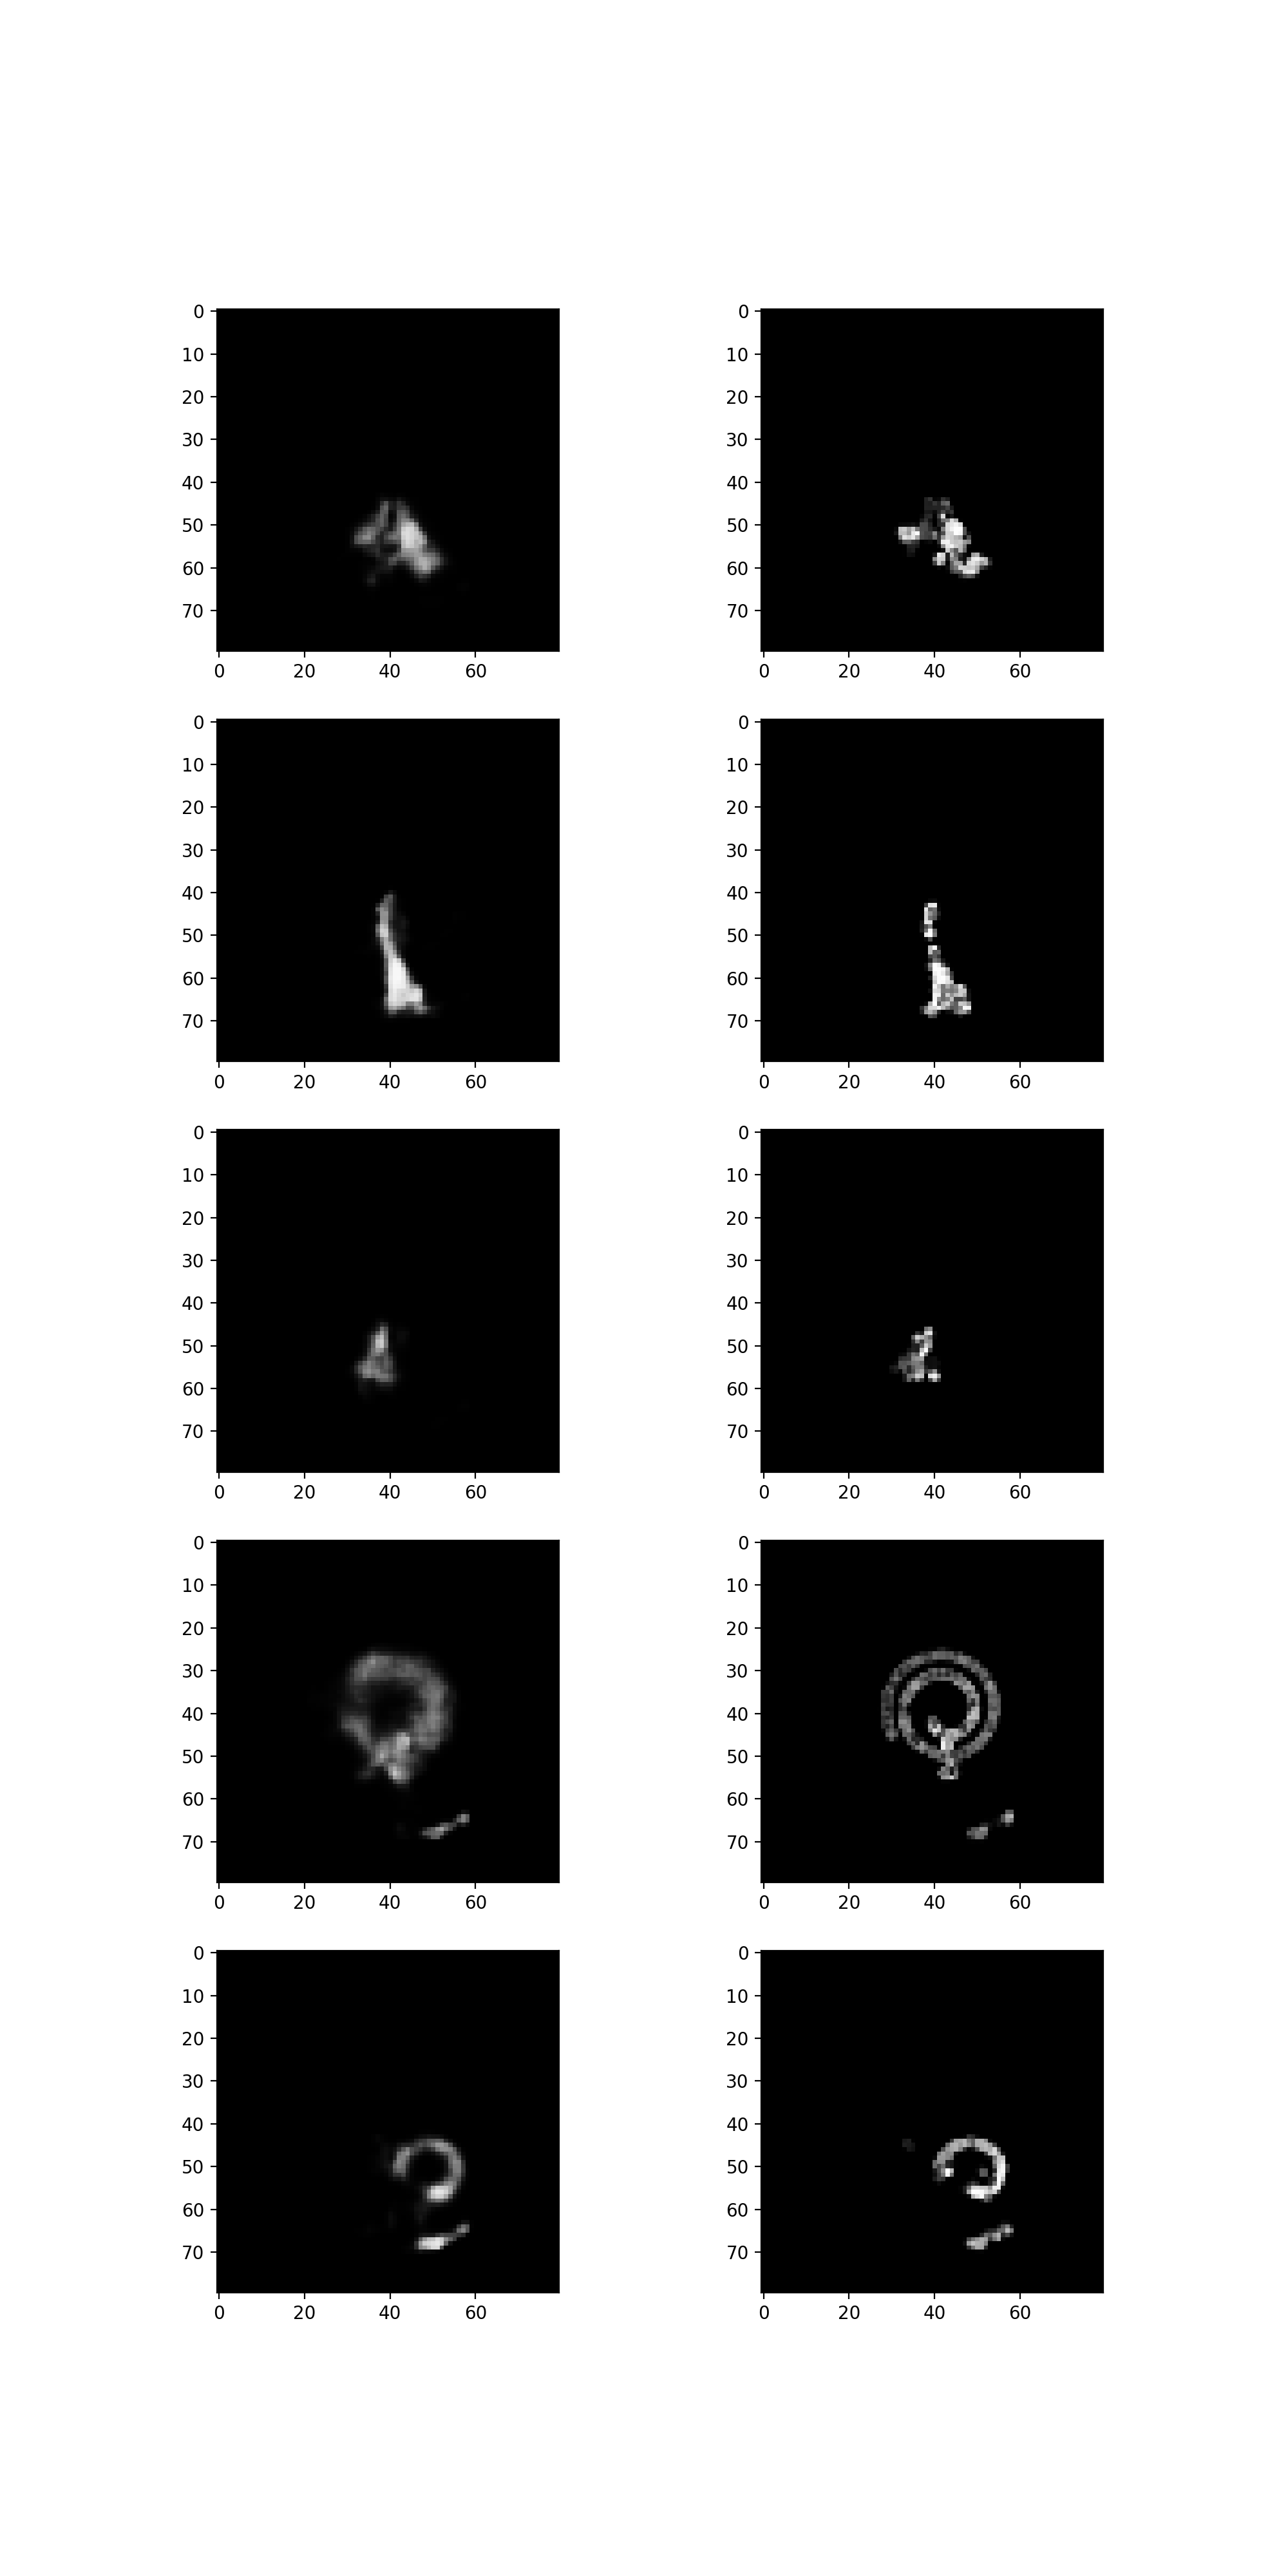

In [10]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

i = 3
which_to_show = [4+i, 8+i, 10+i, 0+i, 12+i]

for w, ax in zip(which_to_show, axs):
    ax[0].imshow(finished[w], vmin=0, vmax=1, cmap="Greys_r")
    ax[1].imshow(reference[w], vmin=0, vmax=1, cmap="Greys_r")